# _Clustering_ para una casa de bolsa

Vamos a inaugurar este reto de 30 proyectos en 30 días con un proyecto relacionado al _clsutering_. En este proyecto vamos a descubrir los diferentes tipos de usuarios con base en sus características para una casa de bolsa. Desarrollaremos perfiles típicos de usuario y daremos recomendaciones sobre cómo mantener a los clientes activos en la app. Además, explicaremos de manera clara y directa qué es el _clustering_ y otros conceptos de ciencia de datos.

## Librerías necesarias
Las librerías son módulos de código que nos facilitan hacer tareas.

- `numpy` y `pandas` nos ayudan a organizar y manipular datos,
- `StandardScaler` nos ayuda a tener las características en la misma escala (lo veremos con más detalle después),
- `Kmeans` nos ayudará a hacer los grupos (también lo veremos con más detalle después)
- y `matplotlib` y `seaborn` nos permiten crear gráficos.

In [1]:
# Manipulación y creación de datos
import numpy as np
import pandas as pd

# Preprocesamiento y clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns


## Creación del DataFrame
Desarrollaremos una tabla con ayuda de `numpy`, _numerical Python_. Esta biblioteca nos ayuda a realizar operaciones matemáticas y estadísticas, así como crear números, que es lo que haremos para tener una tabla con la información que necesitamos.

Crearemos una tabla con los datos de 500 clientes que han usado la app en el último año calendario. En el siguiente bloque de código encontraremos la explicación paso a paso.

In [2]:
# Fijar semilla para reproducibilidad. Así nuestros resultados son replicables.
np.random.seed(42)

# Crear DataFrame con 500 clientes y las características financieras y de uso.
clientes = pd.DataFrame({
    "Edad": np.random.randint(18, 70, size=500),  # Edad entre 18 y 70 años.
    "Dinero_Total_Inv": np.random.normal(200000, 50000, size=500).clip(min=0),  # Dinero total invertido, media y desviación ajustable.
    "Dinero_Prom_Inv": np.random.normal(10000, 5000, size=500).clip(min=0),  # Dinero invertido promedio por operación.
    "Horas_Diarias_App": np.random.uniform(0.1, 2.0, size=500),  # Horas diarias promedio usando la app.
    "Num_Acciones_Compradas": np.random.poisson(10, size=500)  # Número de acciones compradas.
})

# Mostrar primeros registros para comprobar cómo luce la tabla.
display(clientes.head())


,Edad,Dinero_Total_Inv,Dinero_Prom_Inv,Horas_Diarias_App,Num_Acciones_Compradas
0,56,306107.809851,5120.633735,1.112620,7
1,69,251623.263028,15268.208983,0.716234,11
2,46,124031.501702,5253.005556,0.732704,9
3,32,175788.296357,23161.910324,1.372025,5
4,60,263345.557459,12466.589504,1.988865,13


Nuestra tabla ya contiene las columnas que creamos y datos en todas ellas.

## Normalización de los datos
La normalización de datos es un proceso que ajusta los valores para que estén en la misma escala. Al tener números de diferente naturaleza como edades, números de acciones y dinero nuestro modelo podría darle más importancia a alguna característica en particular, pero no queremos eso.

In [3]:
# Creación de un escalador estándar.
scaler = StandardScaler()

# Aplicar al dataset (sin incluir aún la columna cluster).
datos_escalados = scaler.fit_transform(clientes)


## ¿Cuántos grupos deberíamos hacer?
Voy a desarrollar un dendrograma. Un dendrograma es un diagrama en forma de árbol que visualiza cómo se agrupan los datos. Nos permitecomprender cuántos grupos (_clusters_) deberíamos desarrollar. Veamos cómo queda.

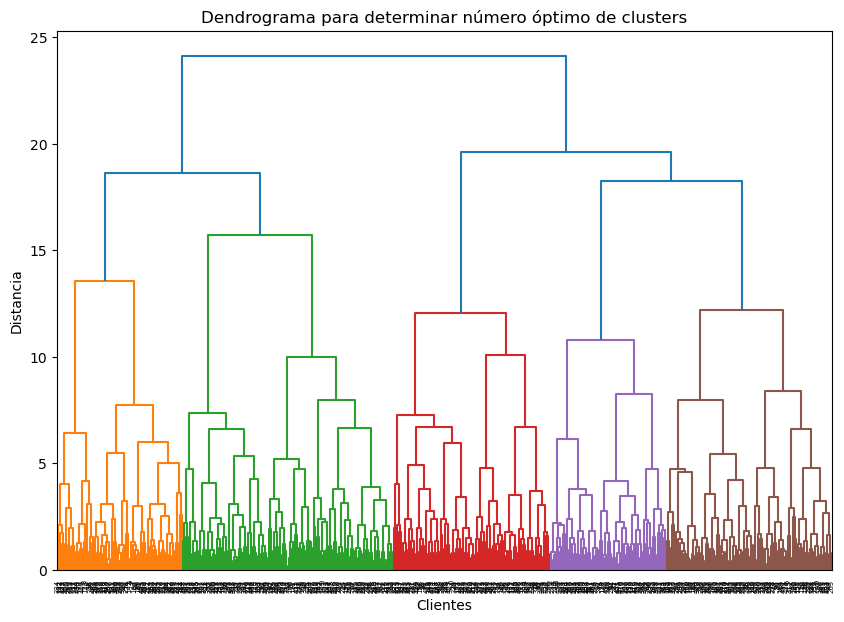

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Calcular matriz de enlace utilizando el método ward para datos escalados
Z = linkage(datos_escalados, method='ward')

# Crear dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma para determinar número óptimo de clusters')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()


En este caso logro identificar tres tipos de jerarquías, así que haremos tres grupos de clientes.

## Empieza lo divertido, empieza el _clustering_
Ya sabemos que haremos tres grupos. Usaremos el algoritmo `KMeans`. Este algoritmo de agrupamiento divide nuestros datos en conjuntos de datos con base en su similitud.

`KMeans` ubicará tres puntos (porque decidí hacer tres grupos) llamados centroides en un espacio que puede tener muchas dimensiones. Luego agrupa los datos (en este caso usuarios) con base en su cercanía a los puntos.

In [5]:
from sklearn.cluster import KMeans

# Crear y entrenar el modelo KMeans
# n_clusters=3, random_state=42 para reproducibilidad, n_init=10 para mejores resultados
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Ajustar el modelo y predecir el cluster de cada usuario
clientes["cluster"] = kmeans.fit_predict(datos_escalados)

# Mostrar primeros registros con su grupo asignado
display(clientes.head())
print()

C:\Users\rober\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\rober\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\rober\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rober\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\rober\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _wina

,Edad,Dinero_Total_Inv,Dinero_Prom_Inv,Horas_Diarias_App,Num_Acciones_Compradas,cluster
0,56,306107.809851,5120.633735,1.112620,7,2
1,69,251623.263028,15268.208983,0.716234,11,1
2,46,124031.501702,5253.005556,0.732704,9,1
3,32,175788.296357,23161.910324,1.372025,5,0
4,60,263345.557459,12466.589504,1.988865,13,2


Ya tenemos nuestra tabla con el número de _cluster_ (grupo) asignado a cada usuario. Los números de _cluster_ son aleatorios y no guardan relación entre ellos. Van del número 0 al número 2.

## Análisis de los _clusters_
Ya que tenemos los números asignados a cada usuario, podemos comenzar a saber más de cada grupo. Vamos a desarrollar una tabla con los promedios de las características de cada _cluster_. 

In [6]:
# Promedio de cada característica por grupo
resumen = clientes.groupby("cluster").mean().round(2)

# Mostrar resumen
display(resumen)


,Edad,Dinero_Total_Inv,Dinero_Prom_Inv,Horas_Diarias_App,Num_Acciones_Compradas
cluster,,,,,
0,28.20,193405.13,12049.82,1.23,9.50
1,50.57,192480.55,10221.53,0.54,9.75
2,54.42,212126.07,9667.92,1.51,11.04


Como podemos ver, parece que hay diferencias notables en la edad, el promedio de dinero invertido, pero tambien similitudes anetre algunos grupos.

## Gráficas de los _clusters_
Ahora graficaremos algunas de las características de cada _cluster_ para entenderlos mejor y que todo sea más visual.

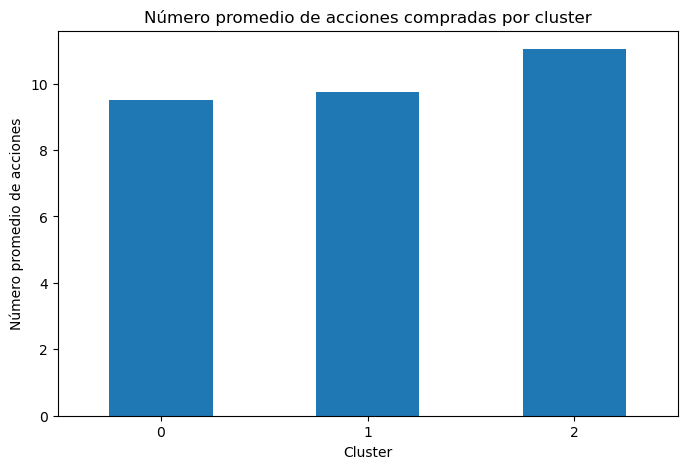

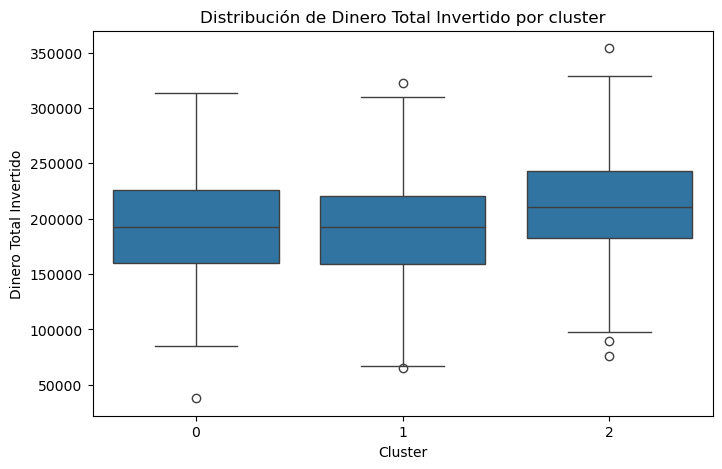

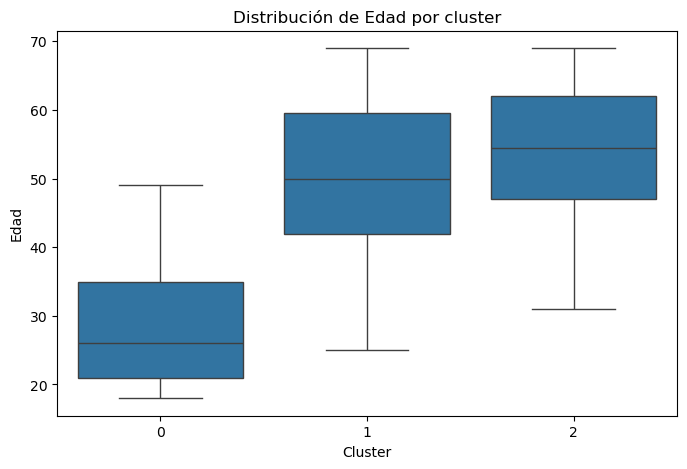

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras del número promedio de acciones compradas por cluster
prom_acciones = clientes.groupby('cluster')['Num_Acciones_Compradas'].mean().round(2)
prom_acciones.plot(kind='bar', figsize=(8,5))
plt.title('Número promedio de acciones compradas por cluster')
plt.xlabel('Cluster')
plt.ylabel('Número promedio de acciones')
plt.xticks(rotation=0)
plt.show()

# Boxplot de Dinero Total Invertido por cluster
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster', y='Dinero_Total_Inv', data=clientes)
plt.title('Distribución de Dinero Total Invertido por cluster')
plt.xlabel('Cluster')
plt.ylabel('Dinero Total Invertido')
plt.show()

# Boxplot de Edad por cluster.
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster', y='Edad', data=clientes)
plt.title('Distribución de Edad por cluster')
plt.xlabel('Cluster')
plt.ylabel('Edad')
plt.show()


## Análisis de los _clusters_ encontrados
### Cluster 0 (jóvenes usuarios activos, inversión promedio alta):

- Edad promedio de 28.20 años.

- Dinero total invertido cercano a 193,405 MXN.

- Dinero promedio por inversión (12,049.82 MXN) es el más alto.

- Usan la app diariamente (1.23 h/día).

- Compran alrededor de 9.50 acciones al año.

- Perfil típico: usuarios jóvenes, realizan operaciones de mayor monto por vez y dedican más tiempo diario a la app. Este grupo representa potencial para fidelización y promoción de productos para grandes inversiones.

### Cluster 1 (usuarios adultos, bajo monto, baja actividad):

- Edad promedio de 50.57 años.

- Dinero total invertido cercano a 192,480.55 MXN.

- Inversión promedio por transacción (10,221.53 MXN).

- Usan la app poco (0.54 h/día).

- Compran cerca de 9.75 acciones.

- Perfil típico: adultos con inversiones moderadas, poca interacción diaria con la plataforma, y operaciones de monto intermedio. Se pueden sugerir estrategias de engagement para incrementar su actividad y el tamaño de las inversiones.

### Cluster 2 (adultos mayores, grandes inversiones, actividad frecuente):

- Edad promedio de 54.42 años.

- Mayor dinero total invertido (212,126.07 MXN).

- Inversión promedio por transacción: 9,667.92 MXN (la menor de los tres grupos).

- Usan la app más tiempo (1.51 h/día).

- Compran 11.04 acciones al año.

- Perfil típico: adultos mayores que invierten grandes sumas y usan la app activamente. Es un segmento relevante para productos premium y estrategias de mantenimiento de capital.

## Conclusiones y recomendaciones

- Usuarios más activos tienden a ser los más jóvenes (cluster 0) o de mayor edad con gran capital (cluster 2), ambos dedican más tiempo en la app y presentan mayores valores en inversiones totales o por frecuencia.

- Se observa que mayor actividad diaria en la app y un mayor monto promedio invertido suelen asociarse con los extremos de edad.

- Es recomendable incentivar a los usuarios menos activos (cluster 1), con campañas de educación financiera o promociones para aumentar tanto la frecuencia como el tamaño de sus inversiones.

- Ofrecer productos personalizados para fidelizar a los más jóvenes y paquetes premium para los adultos mayores con alto capital ayuda a mantener y fortalecer la lealtad de los clientes.

- El análisis de clusters permite descubrir patrones valiosos y tomar decisiones estratégicas sobre usuarios, productos y experiencias basándose en comportamiento real.